In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification

from sklearn.feature_selection import f_classif, SelectKBest, chi2, mutual_info_classif

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

**Common Methods:**
- **F-test (ANOVA)**: For numerical features and categorical target
- **Chi-square**: For categorical features and categorical target
- **Mutual Information**: Measures dependency between features and target
- **Correlation**: Removes highly correlated features

In [3]:
x, y = make_classification(n_samples=2000, n_classes=2, random_state=42)

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)

- Method 1: F-test (for numerical features)

In [4]:
select_f = SelectKBest(score_func=f_classif, k=5)
x_selected_f = select_f.fit_transform(x, y)


In [ ]:
feature_scores = pd.DataFrame({
    'feature' : [f"feature_{i}" for i in range(x.shape[1])],
    'score' : select_f.scores_,
    'selected' : select_f.get_support()
}).sort_values('score', ascending=False)

print("F-test Feature Selection:")
print(feature_scores)

F-test Feature Selection:
       feature        score  selected
9    feature_9  2796.165999      True
1    feature_1  2598.045461      True
4    feature_4  1018.293220      True
19  feature_19     2.502228      True
11  feature_11     1.711479      True
7    feature_7     1.522783     False
15  feature_15     1.160468     False
10  feature_10     1.006424     False
0    feature_0     0.783924     False
14  feature_14     0.737612     False
16  feature_16     0.655369     False
8    feature_8     0.375645     False
6    feature_6     0.373603     False
2    feature_2     0.372303     False
17  feature_17     0.299970     False
13  feature_13     0.199724     False
18  feature_18     0.168832     False
12  feature_12     0.075701     False
5    feature_5     0.035791     False
3    feature_3     0.007107     False


- Method 2: Mutual Information

In [6]:
selector_mutual = SelectKBest(score_func=mutual_info_classif, k=5)
x_selected_mutual = selector_mutual.fit_transform(x, y)

In [ ]:
feature_names = np.array([f"feature_{i}" for i in range(x.shape[1])])

print("\nF-test selected:", feature_names[select_f.get_support()])
print("MI selected:", feature_names[selector_mutual.get_support()])


F-test selected: ['feature_1' 'feature_4' 'feature_9' 'feature_11' 'feature_19']
MI selected: ['feature_1' 'feature_4' 'feature_9' 'feature_12' 'feature_17']


- Method 3: Chi-square (for categorical features)

In [11]:
selector_chi2 = SelectKBest(score_func=f_classif, k=5)
x_selected_chi2 = selector_chi2.fit_transform(x, y)

In [13]:
print("MI selected:", feature_names[selector_chi2.get_support()])

MI selected: ['feature_1' 'feature_4' 'feature_9' 'feature_11' 'feature_19']


- Correlation-Based Selection

In [18]:
# Remove highly correlated features
correlation_matrix = pd.DataFrame(x).corr().abs()

high_corr_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if correlation_matrix.iloc[i, j] > 0.70:
            high_corr_pairs.append((
                correlation_matrix.columns[i],
                correlation_matrix.columns[j],
                correlation_matrix.iloc[i, j]
            ))

print("Highly correlated feature pairs:")
for feat1, feat2, corr in high_corr_pairs:
    print(f"  {feat1} - {feat2}: {corr:.3f}")

Highly correlated feature pairs:
  1 - 9: 0.987
  4 - 9: 0.752


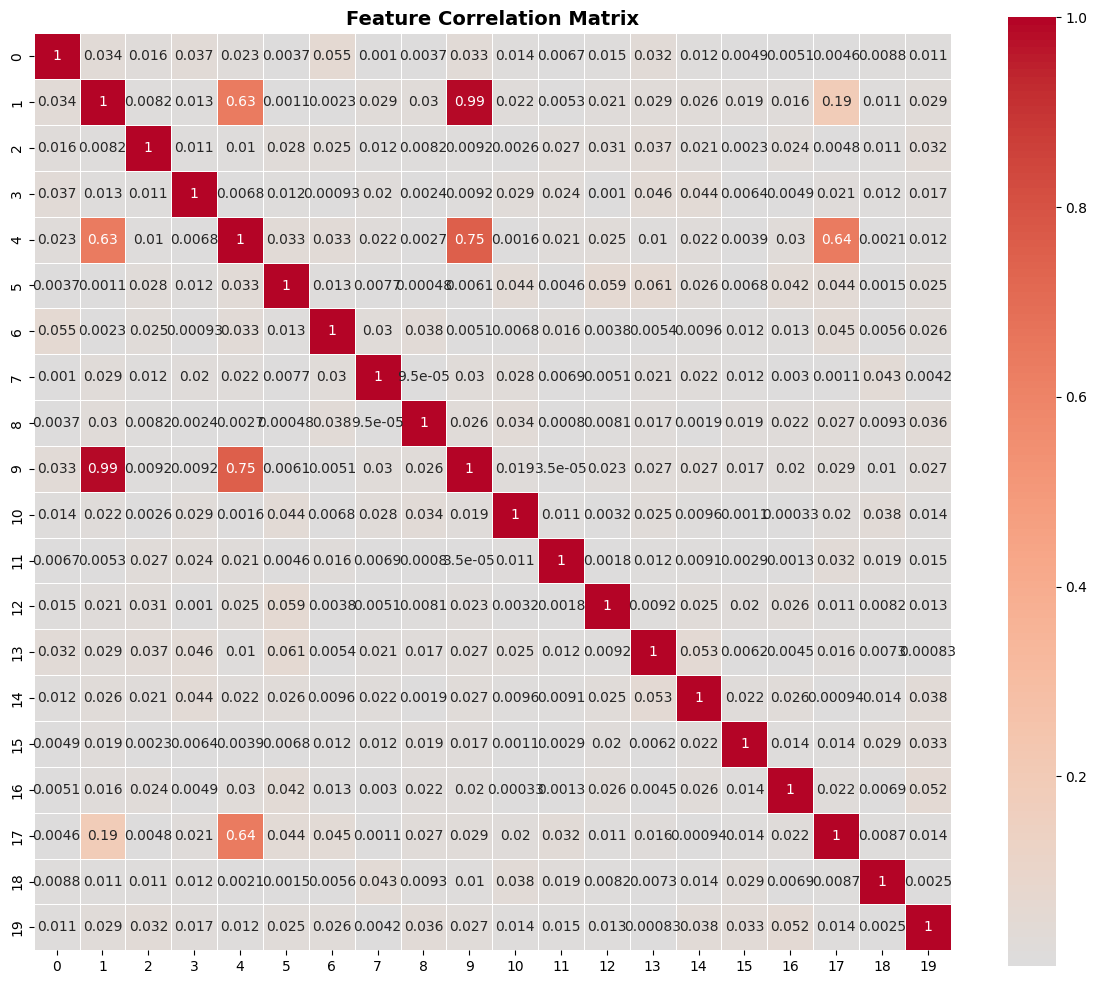

In [16]:
import seaborn as sns

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=0.5)
plt.title('Feature Correlation Matrix', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()